# 特徴量エンジニアリング（UMAP）

In [ ]:
!pip install -U pip -q
!pip install category_encoders -q
!pip install umap-learn -q
!pip install japanize-matplotlib -q
!git clone https://github.com/ironerumi/fe_workshop.git -q

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pd.set_option('display.max_columns', 100)

from umap import UMAP
import category_encoders as ce

import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt
sns.set(font="IPAexGothic")
plt.style.use('ggplot')
%matplotlib inline

from google.colab import files

In [ ]:
# collaboratoryにLendingClub50000.csvをアップロードする。
# uploaded = files.upload() # ローカルからアップロードできるが今回は使用しない。

In [ ]:
# ファイルを読み込む
df = pd.read_csv("fe_workshop/dataset/LendingClub50000.csv")

In [5]:
df.head().T

,0,1,2,3,4
申込ID,1529851,1824764,403548,646411,552526
メンバーID,1793711,2126933,442721,799671,711946
年,2012,2012,2009,2011,2010
月,9,11,5,1,7
ローン申請額,16000,3600,19200,21000,4000
借り入れ目的（大分類）,debt_consolidation,debt_consolidation,wedding,credit_card,other
借り入れ目的（小分類）,Debt Consolidation / Final Wedding Exp,Crush Credit Cards,Consolidate debt and pay for wedding,Wells BofA Credit Card Refi,Debt Consolidation
勤務先,PwC,Morgan Stanley Smith Barney,Aggregate Knowledge,Emerson Process Management,Home Depot
勤続年数,3,2,1,1,1
居住形態,RENT,RENT,RENT,RENT,RENT


In [6]:
# UMAPはカテゴリ変数をそのままでは受け付けないため、年収入によるTargetエンコーディングで数値に変換しておく
df_temp = df[df.columns[2:-1]].copy()

for col in df_temp.columns:  # IDとターゲット以外のカラム
    if (
        df_temp[col].dtype == "object" and df_temp[col].nunique() < 2000
    ):  # カテゴリはTargetエンコーディングする
        te = ce.TargetEncoder()
        df_temp[col] = te.fit_transform(df_temp[[col]], df_temp[["年収"]])[col]

    if df_temp[col].dtype == "object" and df_temp[col].nunique() >= 2000:  # テキストはdropする
        df_temp.drop(col, axis=1, inplace=True)

In [7]:
# UMAPは欠損値を受け付けないため、中央値で埋めておく。
df_temp = df_temp.fillna(df_temp.median())

In [8]:
df_temp.head().T

,0,1,2,3,4
年,2012.000000,2012.000000,2009.000000,2011.000000,2010.000000
月,9.000000,11.000000,5.000000,1.000000,7.000000
ローン申請額,16000.000000,3600.000000,19200.000000,21000.000000,4000.000000
借り入れ目的（大分類）,67800.426841,67800.426841,69243.231103,68737.932374,65983.306278
勤続年数,3.000000,2.000000,1.000000,1.000000,1.000000
居住形態,58234.996737,58234.996737,58234.996737,58234.996737,58234.996737
年収,90400.000000,42500.000000,95000.000000,85000.000000,63500.000000
郵便番号,71241.633405,83148.815586,78131.245356,78673.977567,75091.135802
住所（州）,75177.647562,79444.082366,72415.453038,72415.453038,69727.534377
ローン対収入,23.720000,17.340000,7.580000,17.070000,19.500000


In [9]:
umap = UMAP(n_neighbors=15, min_dist=0.1, metric="euclidean")

In [10]:
%%time
embedding = umap.fit_transform(df_temp)

CPU times: user 1min 47s, sys: 3.55 s, total: 1min 51s
Wall time: 1min 8s


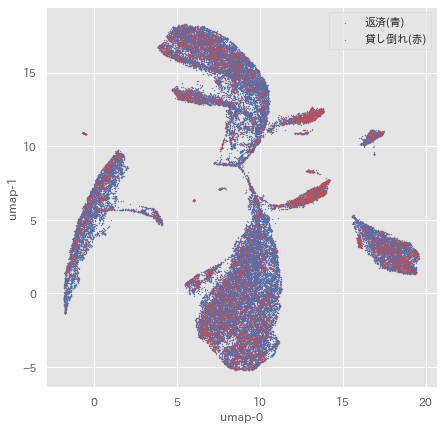

In [11]:
#  UMAPの出力を散布図で見てみよう。
plt.figure(figsize=[7, 7])
plt.scatter(
    embedding[~df["貸し倒れ"]][:, 0],
    embedding[~df["貸し倒れ"]][:, 1],
    s=0.8,
    c="b",
    alpha=0.8,
    label="返済(青)",
)
plt.scatter(
    embedding[df["貸し倒れ"]][:, 0],
    embedding[df["貸し倒れ"]][:, 1],
    s=0.8,
    c="r",
    alpha=0.8,
    label="貸し倒れ(赤)",
)
plt.xlabel("umap-0")
plt.ylabel("umap-1")
plt.legend()
plt.show()

In [12]:
# UMAPの出力を追加の特徴量として元データに追加する。
df["UMAP_0"] = embedding[:, 0]
df["UMAP_1"] = embedding[:, 1]
print(df[["UMAP_0", "UMAP_1"]].head().to_markdown())

|    |   UMAP_0 |   UMAP_1 |
|---:|---------:|---------:|
|  0 |  2.03719 |  5.7102  |
|  1 |  3.91439 |  4.90479 |
|  2 | 10.0784  |  3.84186 |
|  3 |  9.24839 |  3.51233 |
|  4 | 10.8256  |  0.4897  |


In [ ]:
# csvに保存する。
df.to_csv("LendingClub50000_umap.csv", index=False)

In [ ]:
# ダウンロードしたら、DataRobotでもう一度予測してみよう
files.download("LendingClub50000_umap.csv")